In [3]:
import requests
import bs4
import re
from dataclasses import dataclass
import datetime as dt

@dataclass
class Product:
    name: str
    color: str
    cpu: str
    ram: str
    ssd: str
    language: str
    price: float
    currency: str
    

In [4]:
url = "https://geizhals.at/apple-macbook-pro-14-2-m3-v144331.html"
url = "https://geizhals.at/apple-macbook-pro-16-2-m3-v144372.html"
url = "https://geizhals.at/apple-macbook-air-15-m3-v155726.html"
url = "https://geizhals.at/apple-macbook-air-13-m3-v155581.html"
response = requests.get(url)

In [5]:
soup = bs4.BeautifulSoup(response.text)

In [6]:
soup.title

<title>Apple MacBook Air 13" M3 ab € 1097,07 (2024) | Preisvergleich Geizhals Österreich</title>

In [7]:
articles = soup.find_all("article", "galleryview__item card")

products = []
for article in articles:
    
    article_soup = bs4.BeautifulSoup(str(article))
    laptop = article_soup.css.select("h3.galleryview__name a")[0].string ## get config
    price_w_currency= article_soup.css.select("span.price span.gh_price")[0].string ## get config

    currency, price = price_w_currency.split()
    price=float(price.replace(",", "."))

    # print(price, currency)
    name, color, cpu, ram, ssd, language = laptop.split(",")

    product = Product(name=name, color=color, cpu=cpu, ram=ram, ssd=ssd, price=price, currency=currency, language=language)
    products.append(product)

In [8]:
sorted(products, key=lambda p: p.price)

[Product(name='\nApple MacBook Air 13"', color=' silber', cpu=' M3 - 8 Core CPU / 8 Core GPU', ram=' 8GB RAM', ssd=' 256GB SSD', language=' DE\n', price=1097.07, currency='€'),
 Product(name='\nApple MacBook Air 13"', color=' Starlight', cpu=' M3 - 8 Core CPU / 8 Core GPU', ram=' 8GB RAM', ssd=' 256GB SSD', language=' DE\n', price=1104.31, currency='€'),
 Product(name='\nApple MacBook Air 13"', color=' Midnight', cpu=' M3 - 8 Core CPU / 8 Core GPU', ram=' 8GB RAM', ssd=' 256GB SSD', language=' DE\n', price=1104.62, currency='€'),
 Product(name='\nApple MacBook Air 13"', color=' Space Gray', cpu=' M3 - 8 Core CPU / 8 Core GPU', ram=' 8GB RAM', ssd=' 256GB SSD', language=' DE\n', price=1110.07, currency='€'),
 Product(name='\nApple MacBook Air 13"', color=' Starlight', cpu=' M3 - 8 Core CPU / 10 Core GPU', ram=' 8GB RAM', ssd=' 512GB SSD', language=' DE\n', price=1301.1, currency='€'),
 Product(name='\nApple MacBook Air 13"', color=' Midnight', cpu=' M3 - 8 Core CPU / 10 Core GPU', ram='

In [9]:
dt.datetime.now()

datetime.datetime(2024, 10, 7, 21, 9, 39, 895088)

# Preprocessing 

In [10]:

import json
from pathlib import Path
import datetime as dt
import pandas as pd
from functools import reduce



## Iphone 14 Pro

In [54]:
base = "iphone14_pro_256"
colors = ("black", "purple", "silver")
dfs = []

df_merged = pd.DataFrame()

for color in colors:
    f = Path(f"datasets/iphone_prices/{base}_{color}.json")
    with f.open() as fp:
        data= json.load(fp)
    data["response"]
    df = pd.DataFrame(data["response"], columns=["timestamp", "price", "foo"])
    df = df[["timestamp", "price"]]
    df["timestamp"] = df["timestamp"].apply( lambda x: dt.datetime.fromtimestamp(x/1000))
    df = df.copy().set_index("timestamp")
    df = df.sort_values(by="timestamp")
    dfs.append(df)

,price_black,price_purple,price_silver
count,758.000000,758.000000,681.000000
mean,1260.741557,1260.991095,1278.159971
std,106.771381,111.256983,120.682827
min,1069.960000,1099.000000,1084.000000
25%,1179.000000,1160.250000,1193.000000
50%,1225.000000,1219.000000,1238.000000
75%,1391.000000,1396.250000,1399.000000
max,1429.000000,1429.000000,2139.350000


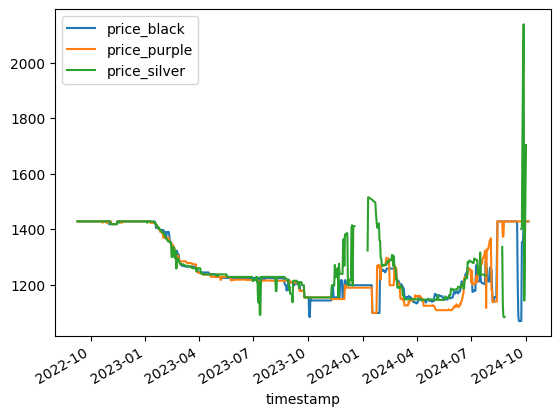

In [55]:
def merge(dfs: list[pd.DataFrame], *, on: str = "timestamp", how="outer"):
    # Merge dataframes using reduce to apply merge on all dataframes
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=on, how=how), dfs)

    return merged_df

# Rename price columns to reflect colors
for i, color in enumerate(colors):
    dfs[i] = dfs[i].rename(columns={'price': f'price_{color}'})

# Merge dataframes using reduce to apply merge on all dataframes
merged_df = merge(dfs)

# Display result
# print(merged_df.iloc[1:])
merged_df = merged_df.iloc[1:]
merged_df.to_csv(f"datasets/iphone_prices/{base}_merged.csv")

merged_df.plot()
merged_df.describe()

## Iphone 15 Pro

,price_black,price_blue,price_nature,price_white
count,387.000000,387.000000,387.000000,387.000000
mean,1197.998501,1199.110207,1197.865349,1203.621266
std,81.362043,77.918648,81.903071,80.565778
min,1078.990000,1109.000000,1009.000000,1114.000000
25%,1128.000000,1129.000000,1128.000000,1129.000000
50%,1168.000000,1175.000000,1169.000000,1169.000000
75%,1276.500000,1276.500000,1275.000000,1277.000000
max,1329.000000,1329.000000,1329.000000,1329.000000


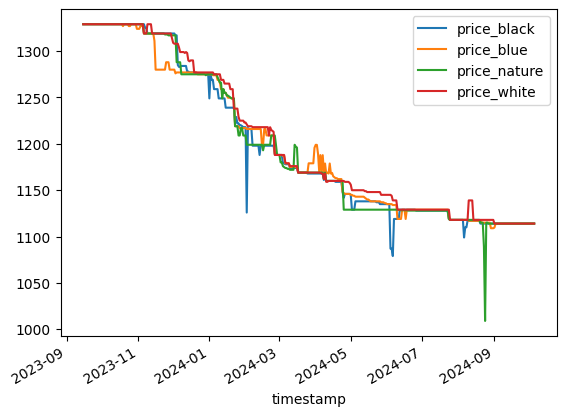

In [52]:
base = "iphone15_pro_256"
colors = ("black", "blue", "nature", "white")
dfs = []

df_merged = pd.DataFrame()

for color in colors:
    f = Path(f"datasets/iphone_prices/{base}_{color}.json")
    with f.open() as fp:
        data= json.load(fp)
    data["response"]
    df = pd.DataFrame(data["response"], columns=["timestamp", "price", "foo"])
    df = df[["timestamp", "price"]]
    df["timestamp"] = df["timestamp"].apply( lambda x: dt.datetime.fromtimestamp(x/1000))
    df = df.copy().set_index("timestamp")
    df = df.sort_values(by="timestamp")
    dfs.append(df)

# Rename price columns to reflect colors
for i, color in enumerate(colors):
    dfs[i] = dfs[i].rename(columns={'price': f'price_{color}'})

# Merge dataframes using reduce to apply merge on all dataframes
merged_df = merge(dfs)

# Display result
# print(merged_df)
merged_df.to_csv(f"datasets/iphone_prices/{base}_merged.csv")
merged_df.plot()
merged_df.describe()

In [48]:
print(merged_df.cov())
merged_df.describe()

              price_black   price_blue  price_nature  price_white
price_black   6619.782013  6267.781282   6614.311772  6504.739110
price_blue    6267.781282  6071.315757   6316.265440  6230.286989
price_nature  6614.311772  6316.265440   6708.113092  6544.943920
price_white   6504.739110  6230.286989   6544.943920  6490.844628


,price_black,price_blue,price_nature,price_white
count,387.000000,387.000000,387.000000,387.000000
mean,1197.998501,1199.110207,1197.865349,1203.621266
std,81.362043,77.918648,81.903071,80.565778
min,1078.990000,1109.000000,1009.000000,1114.000000
25%,1128.000000,1129.000000,1128.000000,1129.000000
50%,1168.000000,1175.000000,1169.000000,1169.000000
75%,1276.500000,1276.500000,1275.000000,1277.000000
max,1329.000000,1329.000000,1329.000000,1329.000000


""


# Iphone 16 Pro

,price_black,price_sand,price_nature,price_white
count,26.000000,26.000000,26.000000,26.000000
mean,1310.044615,1327.961154,1328.999615,1327.922692
std,66.963770,2.932172,0.001961,3.045158
min,1082.580000,1320.000000,1328.990000,1319.000000
25%,1329.000000,1329.000000,1329.000000,1329.000000
50%,1329.000000,1329.000000,1329.000000,1329.000000
75%,1329.000000,1329.000000,1329.000000,1329.000000
max,1329.000000,1329.000000,1329.000000,1329.000000


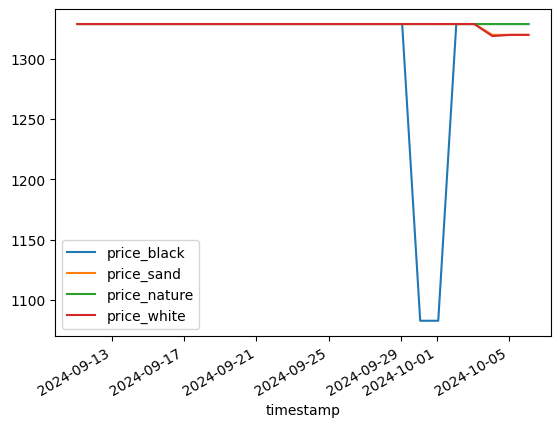

In [50]:
base = "iphone16_pro_256"
colors = ("black", "sand", "nature", "white")
dfs = []

df_merged = pd.DataFrame()

for color in colors:
    f = Path(f"datasets/iphone_prices/{base}_{color}.json")
    with f.open() as fp:
        data= json.load(fp)
    data["response"]
    df = pd.DataFrame(data["response"], columns=["timestamp", "price", "foo"])
    df = df[["timestamp", "price"]]
    df["timestamp"] = df["timestamp"].apply( lambda x: dt.datetime.fromtimestamp(x/1000))
    df = df.copy().set_index("timestamp")
    df = df.sort_values(by="timestamp")
    dfs.append(df)

# Rename price columns to reflect colors
for i, color in enumerate(colors):
    dfs[i] = dfs[i].rename(columns={'price': f'price_{color}'})

# Merge dataframes using reduce to apply merge on all dataframes
merged_df = merge(dfs)

# Display result
# print(merged_df)
merged_df.to_csv(f"datasets/iphone_prices/{base}_merged.csv")
merged_df.plot()
merged_df.describe()

,price_black,price_blue,price_nature,price_white
count,387.000000,387.000000,387.000000,387.000000
mean,1197.998501,1199.110207,1197.865349,1203.621266
std,81.362043,77.918648,81.903071,80.565778
min,1078.990000,1109.000000,1009.000000,1114.000000
25%,1128.000000,1129.000000,1128.000000,1129.000000
50%,1168.000000,1175.000000,1169.000000,1169.000000
75%,1276.500000,1276.500000,1275.000000,1277.000000
max,1329.000000,1329.000000,1329.000000,1329.000000


                     price_green
timestamp                       
2022-03-09 01:00:00      1269.00
2022-03-10 01:00:00      1269.00
2022-03-11 01:00:00      1269.00
2022-03-12 01:00:00      1269.00
2022-03-13 01:00:00      1269.00
...                          ...
2024-09-30 02:00:00          NaN
2024-10-01 02:00:00          NaN
2024-10-02 02:00:00       750.65
2024-10-03 02:00:00       750.65
2024-10-04 02:00:00       750.65

[941 rows x 1 columns]


<Axes: xlabel='timestamp'>

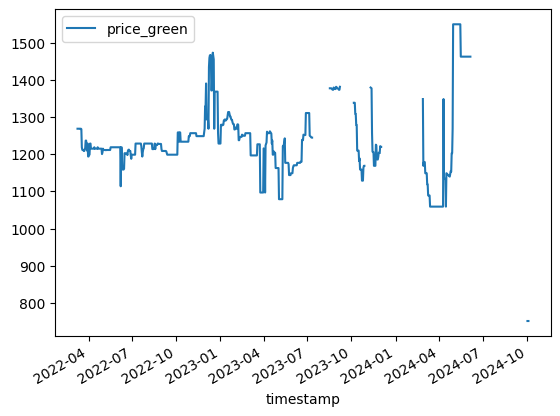

In [35]:
base = "iphone13_pro_256"
colors = ("green",)
dfs = []

df_merged = pd.DataFrame()

for color in colors:
    f = Path(f"datasets/iphone_prices/{base}_{color}.json")
    with f.open() as fp:
        data= json.load(fp)
    data["response"]
    df = pd.DataFrame(data["response"], columns=["timestamp", "price", "foo"])
    df = df[["timestamp", "price"]]
    df["timestamp"] = df["timestamp"].apply( lambda x: dt.datetime.fromtimestamp(x/1000))
    df = df.copy().set_index("timestamp")
    df = df.sort_values(by="timestamp")
    dfs.append(df)

# Rename price columns to reflect colors
for i, color in enumerate(colors):
    dfs[i] = dfs[i].rename(columns={'price': f'price_{color}'})

# Merge dataframes using reduce to apply merge on all dataframes
merged_df = merge(dfs)

# Display result
print(merged_df)
merged_df.to_csv(f"datasets/iphone_prices/{base}_merged.csv")
merged_df.plot()

In [41]:
df.head()

,timestamp,price,foo
0,1662595200000,1429.0,1
1,1662681600000,1429.0,1
2,1662768000000,1429.0,1
3,1662854400000,1429.0,1
4,1662940800000,1429.0,1
